In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Linear Regression
from sklearn.linear_model import LinearRegression

# Cross Validate
from sklearn.model_selection import cross_validate

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# PCA
from sklearn.decomposition import PCA

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVC
from sklearn.svm import SVC

# Clustering
from sklearn.cluster import KMeans

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Data Collection 

In [2]:
# Read dataset
data = pd.read_csv("malicious_phish.csv")

In [3]:
# Length of dataset
len(data)

651191

In [4]:
# Size of dataset
data.shape

(651191, 2)

In [5]:
data.keys()

Index(['url', 'type'], dtype='object')

In [6]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [7]:
data.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


# Prepare The Dataset

In [9]:
dataset = data.copy()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [11]:
import tldextract

In [12]:
# Extracting special characters and creating new features
# Özel karakterleri çıkartma ve yeni özellikler oluşturma

# URL uzunluğu
dataset['url_length'] = dataset['url'].apply(lambda x: len(x)) 

# Rakamlların sayısı
dataset['number_count'] = dataset['url'].apply(lambda x: sum(c.isdigit() for c in x))

# Alt dizin sayısı
dataset['subdir_count'] = dataset['url'].apply(lambda x: x.count('/'))

# Nokta sayısı
dataset['dot_count'] = dataset['url'].apply(lambda x: x.count('.'))

# Soru işareti sayısı
dataset['question_mark_count'] = dataset['url'].apply(lambda x: x.count('?'))

# URL içindeki özel karakter sayısı
special_characters = ['@', '#', '$', '%', '&', '*', '+', '=', '|', '\\', ':']
dataset['special_char_count'] = dataset['url'].apply(lambda x: sum(x.count(char) for char in special_characters))

# URL içindeki parametre sayısı
dataset['param_count'] = dataset['url'].apply(lambda x: x.count('&') + 1 if '?' in x else 0)

# URL içindeki harf ve sayı oranları
dataset['letter_ratio'] = dataset['url'].apply(lambda x: sum(c.isalpha() for c in x) / len(x))
dataset['digit_ratio'] = dataset['url'].apply(lambda x: sum(c.isdigit() for c in x) / len(x))

# TLD (Top Level Domain) çeşiti
dataset['tld_type'] = dataset['url'].apply(lambda x: tldextract.extract(x).suffix)

# TLD (Top Level Domain) uzunluğu
dataset['tld_length'] = dataset['url'].apply(lambda x: len(tldextract.extract(x).suffix))

# Dosya uzantısı var mı yok mu?
dataset['has_extension'] = dataset['url'].apply(lambda x: 1 if '.' in x else 0)

# Domain Name Analysis
# Domain Adı Analizi
dataset['domain'] = dataset['url'].apply(lambda x: tldextract.extract(x).domain)
dataset['subdomain'] = dataset['url'].apply(lambda x: tldextract.extract(x).subdomain)
dataset['domain_length'] = dataset['domain'].apply(lambda x: len(x))
dataset['subdomain_length'] = dataset['subdomain'].apply(lambda x: len(x))

In [13]:
dataset.head(10)

,url,type,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld_type,tld_length,has_extension,domain,subdomain,domain_length,subdomain_length
0,br-icloud.com.br,phishing,16,0,0,2,0,0,0,0.812500,0.000000,com.br,6,1,br-icloud,,9,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,1,2,2,0,0,0,0.828571,0.028571,com,3,1,mp3raid,,7,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,1,3,2,0,0,0,0.806452,0.032258,org,3,1,bopsecrets,,10,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,7,3,3,1,8,4,0.715909,0.079545,be,2,1,garage-pirenne,www,14,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,22,3,2,1,6,3,0.846809,0.093617,net,3,1,adventure-nicaragua,,19,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,118,1,5,2,0,1,0,0.788136,0.008475,net,3,1,buzzfil,,7,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,45,4,6,2,0,0,0,0.688889,0.088889,com,3,1,go,espn,2,4
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,46,0,1,1,1,1,1,0.869565,0.000000,com,3,1,yourbittorrent,,14,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,44,0,3,2,0,1,0,0.840909,0.000000,com,3,1,pashminaonline,www,14,3
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,45,5,2,1,0,0,0,0.733333,0.111111,com,3,1,allmusic,,8,0


In [14]:
dataset.describe()

,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld_length,has_extension,domain_length,subdomain_length
count,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000,651191.000000
mean,60.156831,5.527249,2.950265,2.195453,0.223782,1.944052,0.592739,0.774518,0.072662,2.993948,0.999906,9.847420,3.136576
std,44.753902,11.700686,1.904187,1.490732,0.441220,5.638192,1.500660,0.120364,0.101703,0.906767,0.009678,4.840889,10.204702
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.732824,0.000000,3.000000,1.000000,6.000000,0.000000
50%,47.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.800000,0.032258,3.000000,1.000000,9.000000,0.000000
75%,77.000000,7.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.857143,0.107143,3.000000,1.000000,13.000000,3.000000
max,2175.000000,1204.000000,41.000000,42.000000,20.000000,277.000000,51.000000,1.000000,0.800000,18.000000,1.000000,151.000000,230.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  651191 non-null  object 
 1   type                 651191 non-null  object 
 2   url_length           651191 non-null  int64  
 3   number_count         651191 non-null  int64  
 4   subdir_count         651191 non-null  int64  
 5   dot_count            651191 non-null  int64  
 6   question_mark_count  651191 non-null  int64  
 7   special_char_count   651191 non-null  int64  
 8   param_count          651191 non-null  int64  
 9   letter_ratio         651191 non-null  float64
 10  digit_ratio          651191 non-null  float64
 11  tld_type             651191 non-null  object 
 12  tld_length           651191 non-null  int64  
 13  has_extension        651191 non-null  int64  
 14  domain               651191 non-null  object 
 15  subdomain        

# Select Target Value

In [16]:
# Finding the unique values of the target variable in the dataset
dataset.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [17]:
# Finding the number of each value of the target variable by grouping
print(dataset.groupby('type').size())

type
benign        428103
defacement     96457
malware        32520
phishing       94111
dtype: int64


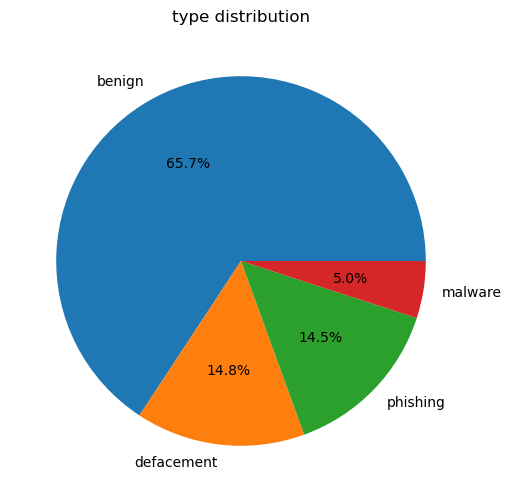

In [18]:
# A pie chart or donut chart is used to show the percentages of categorical data.
# Kategorik verilerin yüzdesel oranlarını göstermek için pasta grafiği veya donut grafiği kullanılır.

# Select the categorical variable
categorical_var = 'type'

# Calculate the values and counts of the categorical variable in the dataset
category_counts = dataset[categorical_var].value_counts()
categories = category_counts.index
counts = category_counts.values

# Draw the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title(f"{categorical_var} distribution")
plt.show()

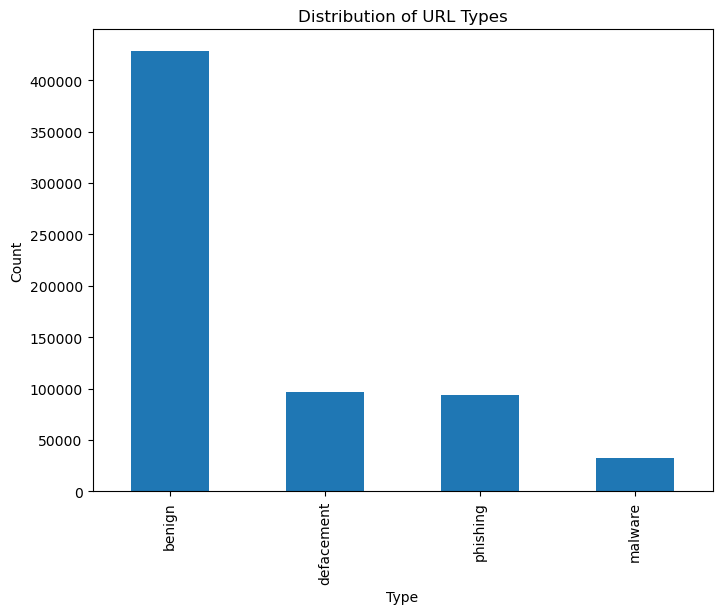

In [19]:
# Plot the bar plot of the type variable
plt.figure(figsize=(8, 6))
dataset['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of URL Types')
plt.show()

C:\Users\dogan\AppData\Local\Temp\ipykernel_23880\4195842267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean = dataset.groupby(dataset.type).mean()


<Figure size 1000x600 with 0 Axes>

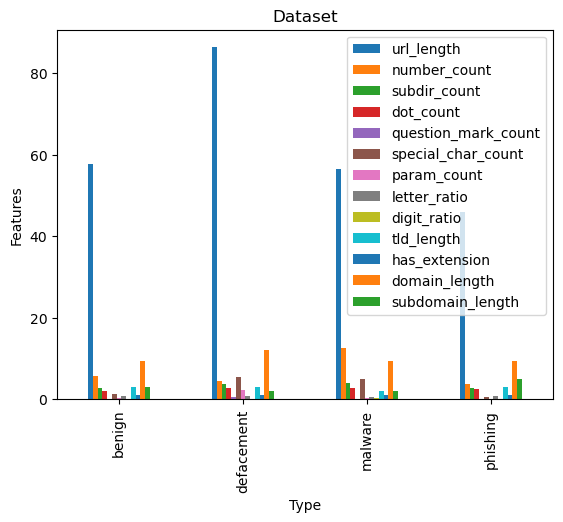

In [20]:
# Show the averages of each columns as histograms
plt.figure(figsize=(10,6))
data_mean = dataset.groupby(dataset.type).mean()
data_mean.plot.bar()
plt.title("Dataset")
plt.xlabel("Type")
plt.ylabel("Features")
plt.show()

# Pre-Processing

We check the missing data of each cell with the "isnull()" function. Then we calculate the number of missing values with the sum() function. This way we can display the number of missing values in each column.

"isnull()" fonksiyonu ile her hücrenin eksik olan verilerini kontrol ediyoruz. Ardından sum() fonksiyonu ile eksik değer sayısını hesaplıyoruz. Bu şekilde her sütundaki eksik değer sayısını görüntüleyebiliriz.

In [21]:
# Checking for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

url                    0
type                   0
url_length             0
number_count           0
subdir_count           0
dot_count              0
question_mark_count    0
special_char_count     0
param_count            0
letter_ratio           0
digit_ratio            0
tld_type               0
tld_length             0
has_extension          0
domain                 0
subdomain              0
domain_length          0
subdomain_length       0
dtype: int64


In [22]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

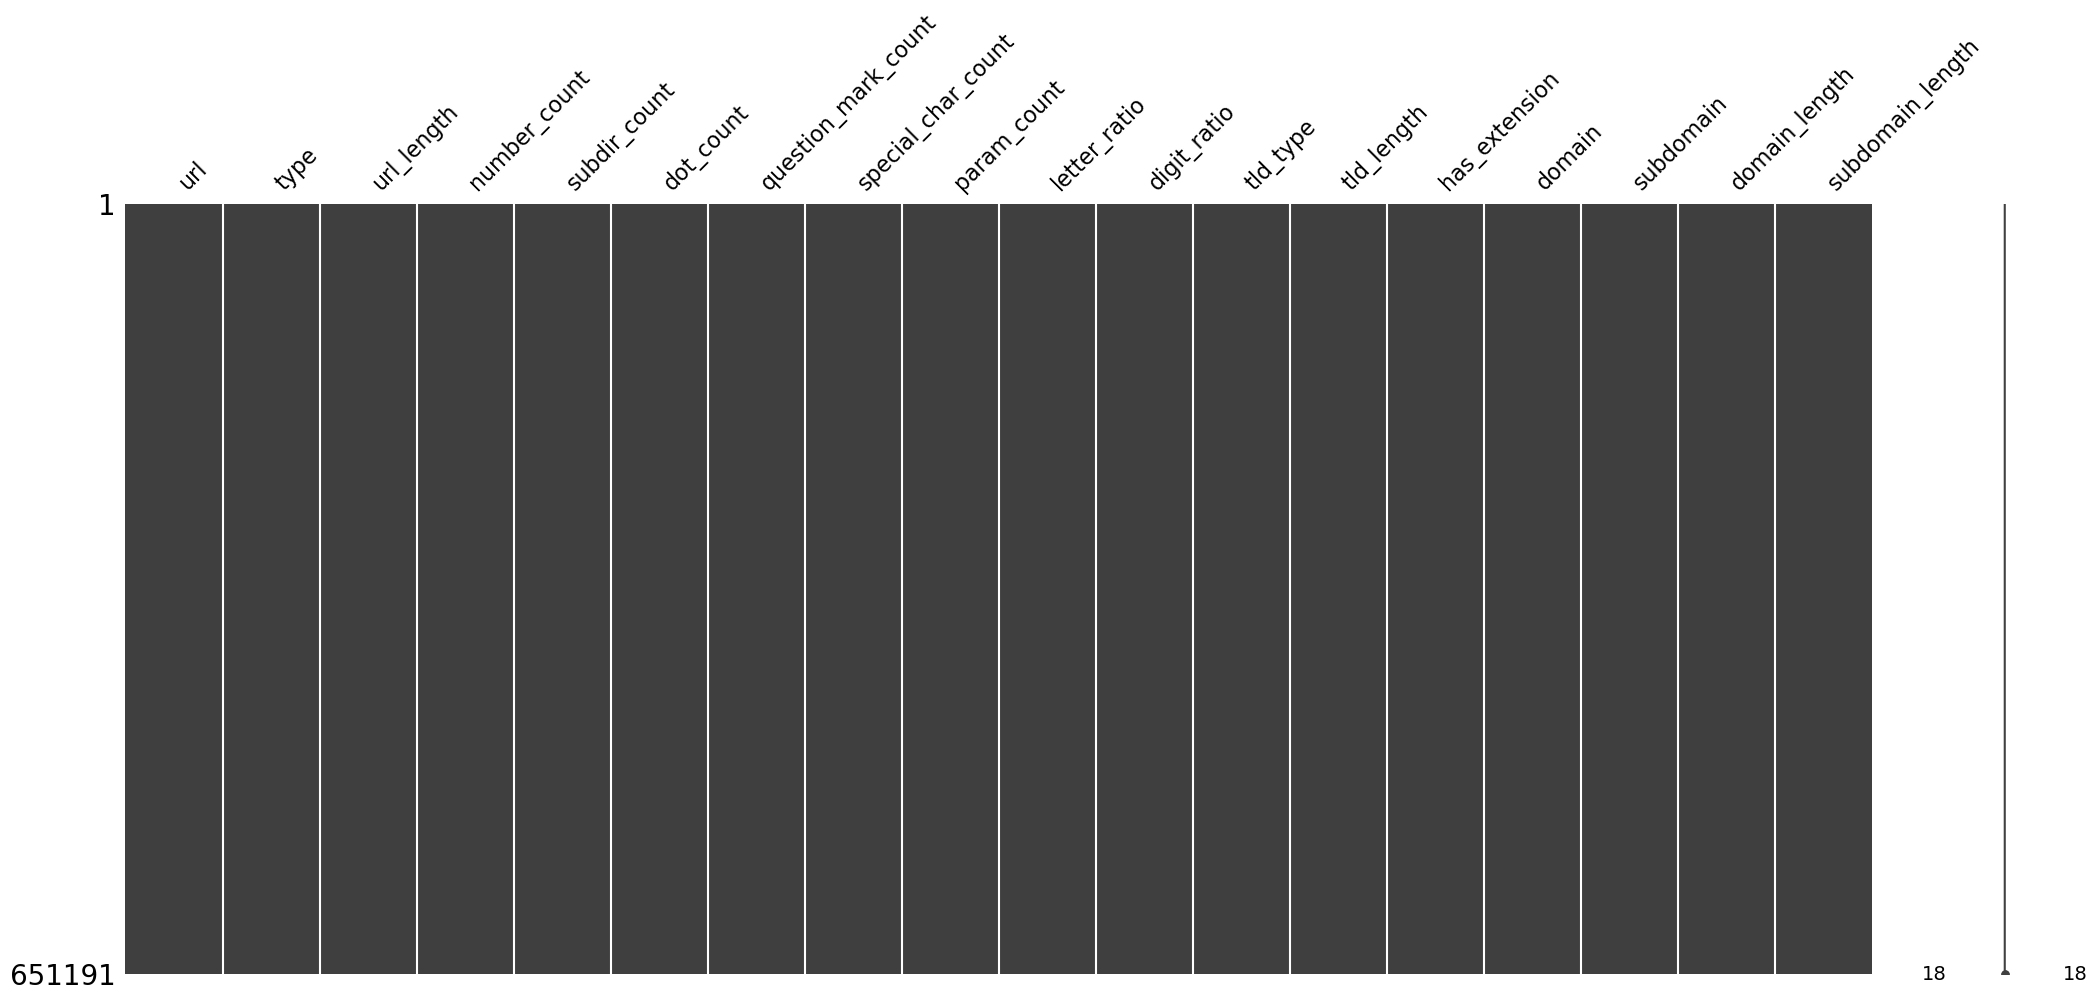

In [23]:
import missingno as msno
msno.matrix(dataset)

We can use the "fillna()" and "dropna()" functions to fill or remove rows or columns with missing values.

Eksik değerlerin olduğu satırları ya da sütunları doldurma veya kaldırma işlemleri için ise "fillna()" ve "dropna()" fonksiyonlarını kullanabiliriz.

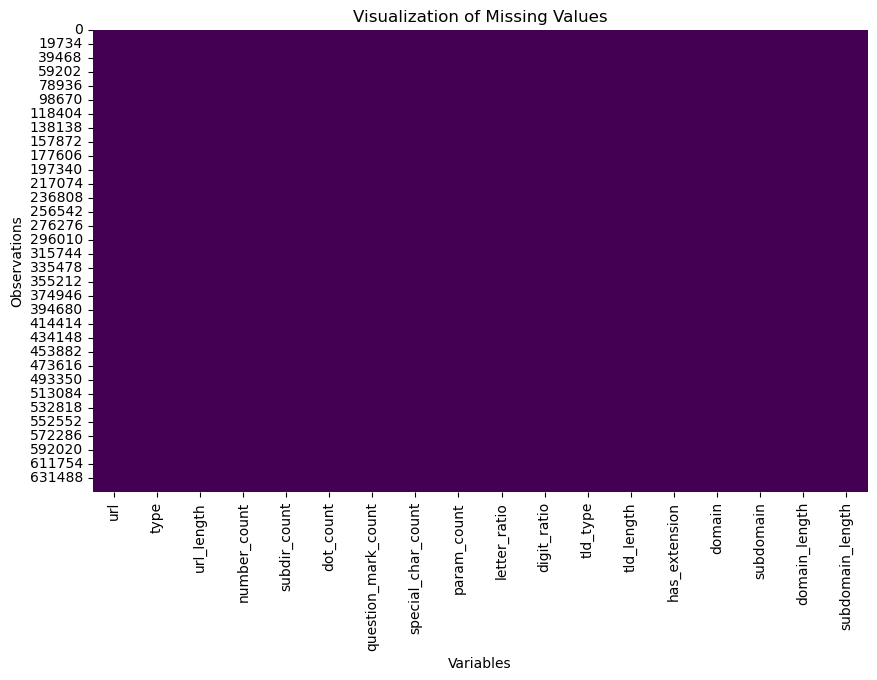

In [24]:
# Visualization of missing values
plt.figure(figsize=(10, 6))
plt.title("Visualization of Missing Values")
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False)
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.show()

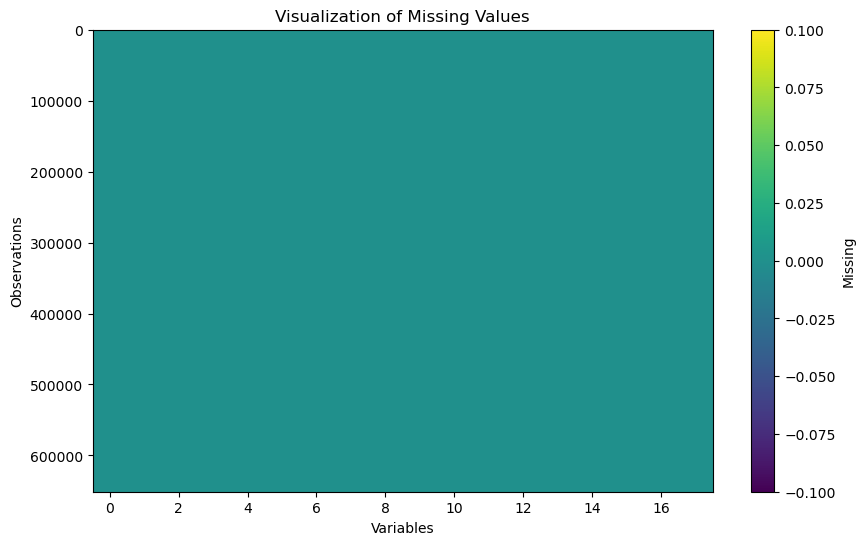

In [25]:
# Visualization of missing values
plt.figure(figsize=(10, 6))
plt.title("Visualization of Missing Values")
plt.imshow(dataset.isnull(), cmap='viridis', aspect='auto')
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.colorbar(label="Missing")
plt.show()

We can use the duplicated() function to detect duplicate rows in your dataset. This function returns a boolean (True/False) series indicating whether each row is repeated. We can use the drop_duplicates() function to remove duplicate rows. This function removes duplicate rows from the dataset and returns a cleaned dataset. After removing duplicate rows, we can check the cleaned dataset.

Veri setinizdeki yinelenen satırları tespit etmek için duplicated() fonksiyonunu kullanabilirsiniz. Bu fonksiyon, her bir satırın yinelenip yinelenmediğini belirten bir boolean (True/False) serisi döndürür. Yinelenen satırları kaldırmak için drop_duplicates() fonksiyonunu kullanabilirsiniz. Bu fonksiyon, yinelenen satırları veri setinden kaldırır ve temizlenmiş bir veri seti döndürür. Yinelenen satırları kaldırdıktan sonra, temizlenmiş veri setini kontrol edebiliriz.

In [26]:
# Detecting duplicate rows
duplicated_rows = dataset.duplicated()
duplicated_count = duplicated_rows.sum()

print("Total Duplicate Rows:", duplicated_count)

Total Duplicate Rows: 10066


In [27]:
# Remove duplicate rows
dataset = dataset.drop_duplicates()

# Checking the cleaned dataset
print("Cleaned Dataset Row Count:", len(dataset))

Cleaned Dataset Row Count: 641125


We can use encoding methods to convert categorical values to numeric values. For example, we can convert nominal categorical variables with one-hot encoding or label encoding.

Kategorik değerleri sayısal değerlere dönüştürmek için encoding yöntemlerini kullanabilirsiniz. Örneğin, nominal kategorik değişkenleri one-hot encoding veya label encoding yöntemleriyle dönüştürebilirsiniz.

In [28]:
dataset.drop('url', axis=1, inplace=True)

# Label encoding (Etiket Kodlama)
label_encoder = LabelEncoder()
dataset['tld_type'] = label_encoder.fit_transform(dataset['tld_type'])
dataset['domain'] = label_encoder.fit_transform(dataset['domain'])
dataset['subdomain'] = label_encoder.fit_transform(dataset['domain'])
dataset['type'] = label_encoder.fit_transform(dataset['type'])

In [29]:
dataset.head(10)

,type,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld_type,tld_length,has_extension,domain,subdomain,domain_length,subdomain_length
0,3,16,0,0,2,0,0,0,0.812500,0.000000,164,6,1,24447,24447,9,0
1,0,35,1,2,2,0,0,0,0.828571,0.028571,157,3,1,92802,92802,7,0
2,0,31,1,3,2,0,0,0,0.806452,0.032258,663,3,1,24053,24053,10,0
3,1,88,7,3,3,1,8,4,0.715909,0.079545,67,2,1,56660,56660,14,3
4,1,235,22,3,2,1,6,3,0.846809,0.093617,586,3,1,9157,9157,19,0
5,0,118,1,5,2,0,1,0,0.788136,0.008475,586,3,1,26419,26419,7,0
6,0,45,4,6,2,0,0,0,0.688889,0.088889,157,3,1,58842,58842,2,4
7,0,46,0,1,1,1,1,1,0.869565,0.000000,157,3,1,150862,150862,14,0
8,1,44,0,3,2,0,1,0,0.840909,0.000000,157,3,1,103917,103917,14,3
9,0,45,5,2,1,0,0,0,0.733333,0.111111,157,3,1,11399,11399,8,0


In the code, we draw a box plot using the seaborn library. The boxplot is a commonly used method for visualizing outliers. A box is drawn for each column and outliers are represented by dots.

Kodda, seaborn kütüphanesini kullanarak kutu grafiği (box plot) çiziyoruz. Kutu grafiği, aykırı değerleri görselleştirmek için yaygın olarak kullanılan bir yöntemdir. Her sütun için bir kutu çizilir ve aykırı değerler noktalarla temsil edilir.

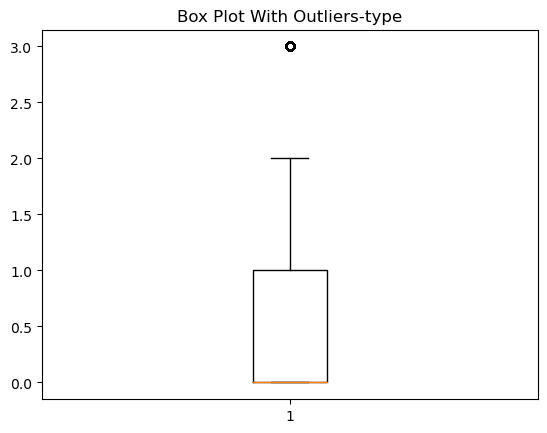

In [30]:
# Create a box plot to visualize outliers for target
plt.boxplot(dataset.type)
plt.title("Box Plot With Outliers-type")
plt.show()

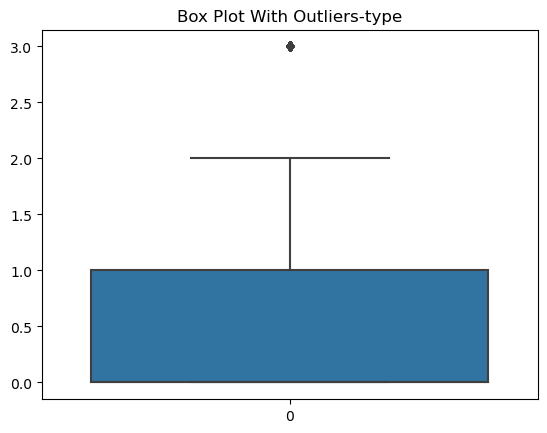

In [31]:
sns.boxplot(dataset.type)
plt.title("Box Plot With Outliers-type")
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Correlation

Heatmaps are often used to visualize the correlation matrix. The correlation matrix shows the relationships between the variables with a color scale. High positive correlations are shown in darker color while high negative correlations are shown in lighter color.

Korelasyon matrisini görselleştirmek için genellikle ısı haritaları (heatmap) kullanılır. Korelasyon matrisi, değişkenler arasındaki ilişkileri renk skalasıyla gösterir. Yüksek pozitif korelasyonlar daha koyu renkte gösterilirken, yüksek negatif korelasyonlar daha açık renkte gösterilir.

In [32]:
data_corr =dataset.corr()
data_corr

,type,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld_type,tld_length,has_extension,domain,subdomain,domain_length,subdomain_length
type,1.000000,-0.065156,-0.035202,0.036551,0.177884,-0.031923,0.007973,0.026296,-0.044135,-0.005410,0.065620,-0.048464,-0.019498,-0.067015,-0.067015,0.041113,0.053236
url_length,-0.065156,1.000000,0.689454,0.463699,0.385981,0.417189,0.561851,0.492924,-0.246890,0.251187,0.040772,0.042471,0.000883,-0.010227,-0.010227,0.086790,0.277136
number_count,-0.035202,0.689454,1.000000,0.251463,0.308200,0.205355,0.455139,0.173763,-0.575708,0.655564,-0.006920,-0.056416,0.002056,-0.046640,-0.046640,-0.020368,0.351856
subdir_count,0.036551,0.463699,0.251463,1.000000,0.194218,0.093087,0.152550,0.071011,-0.306407,0.197838,0.020993,-0.022215,0.013805,-0.040458,-0.040458,-0.067785,-0.024563
dot_count,0.177884,0.385981,0.308200,0.194218,1.000000,0.268275,0.117287,0.220625,-0.207578,0.153967,0.048598,0.078825,0.014231,-0.038162,-0.038162,0.001114,0.581691
question_mark_count,-0.031923,0.417189,0.205355,0.093087,0.268275,1.000000,0.404462,0.727691,-0.139350,0.080848,0.020960,0.023343,0.001936,0.045615,0.045615,0.029616,0.003401
special_char_count,0.007973,0.561851,0.455139,0.152550,0.117287,0.404462,1.000000,0.560419,-0.289614,0.171641,0.068980,-0.016645,-0.001152,-0.011522,-0.011522,0.015267,-0.016866
param_count,0.026296,0.492924,0.173763,0.071011,0.220625,0.727691,0.560419,1.000000,-0.104972,0.030851,0.055730,0.015320,0.002496,0.008478,0.008478,0.090244,-0.002253
letter_ratio,-0.044135,-0.246890,-0.575708,-0.306407,-0.207578,-0.139350,-0.289614,-0.104972,1.000000,-0.925914,0.067178,0.256666,0.025699,0.148615,0.148615,0.168470,-0.070571
digit_ratio,-0.005410,0.251187,0.655564,0.197838,0.153967,0.080848,0.171641,0.030851,-0.925914,1.000000,-0.101159,-0.236702,0.001008,-0.149338,-0.149338,-0.084824,0.127783


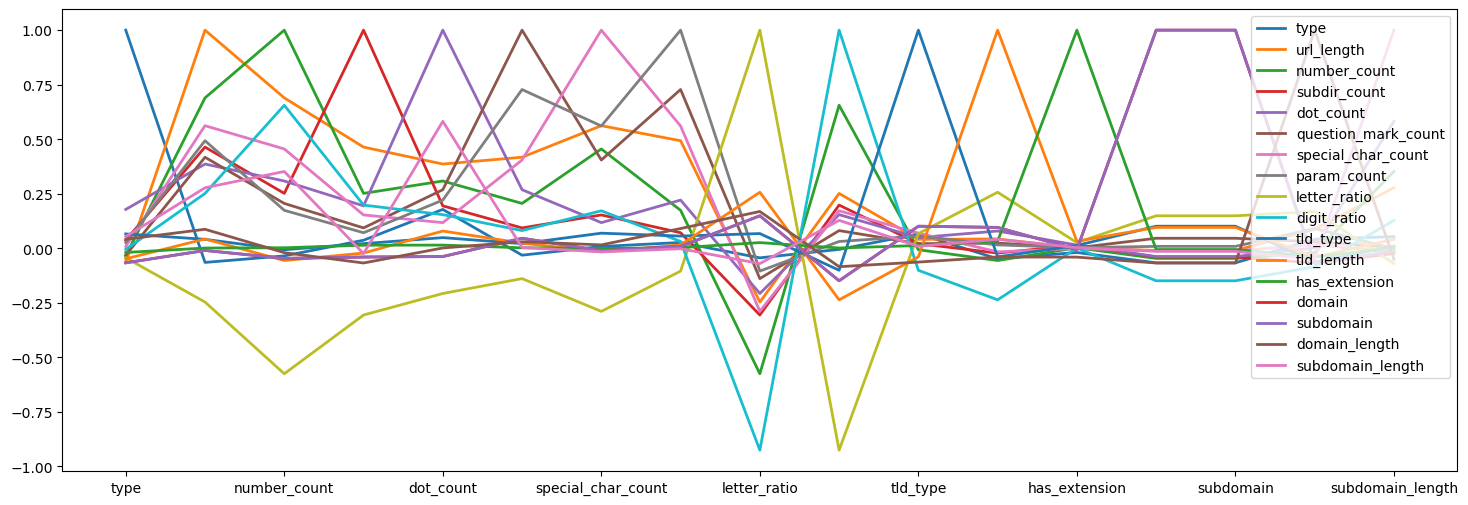

In [33]:
data_corr.plot(figsize=(18,6), linewidth=2).legend(loc='upper right')

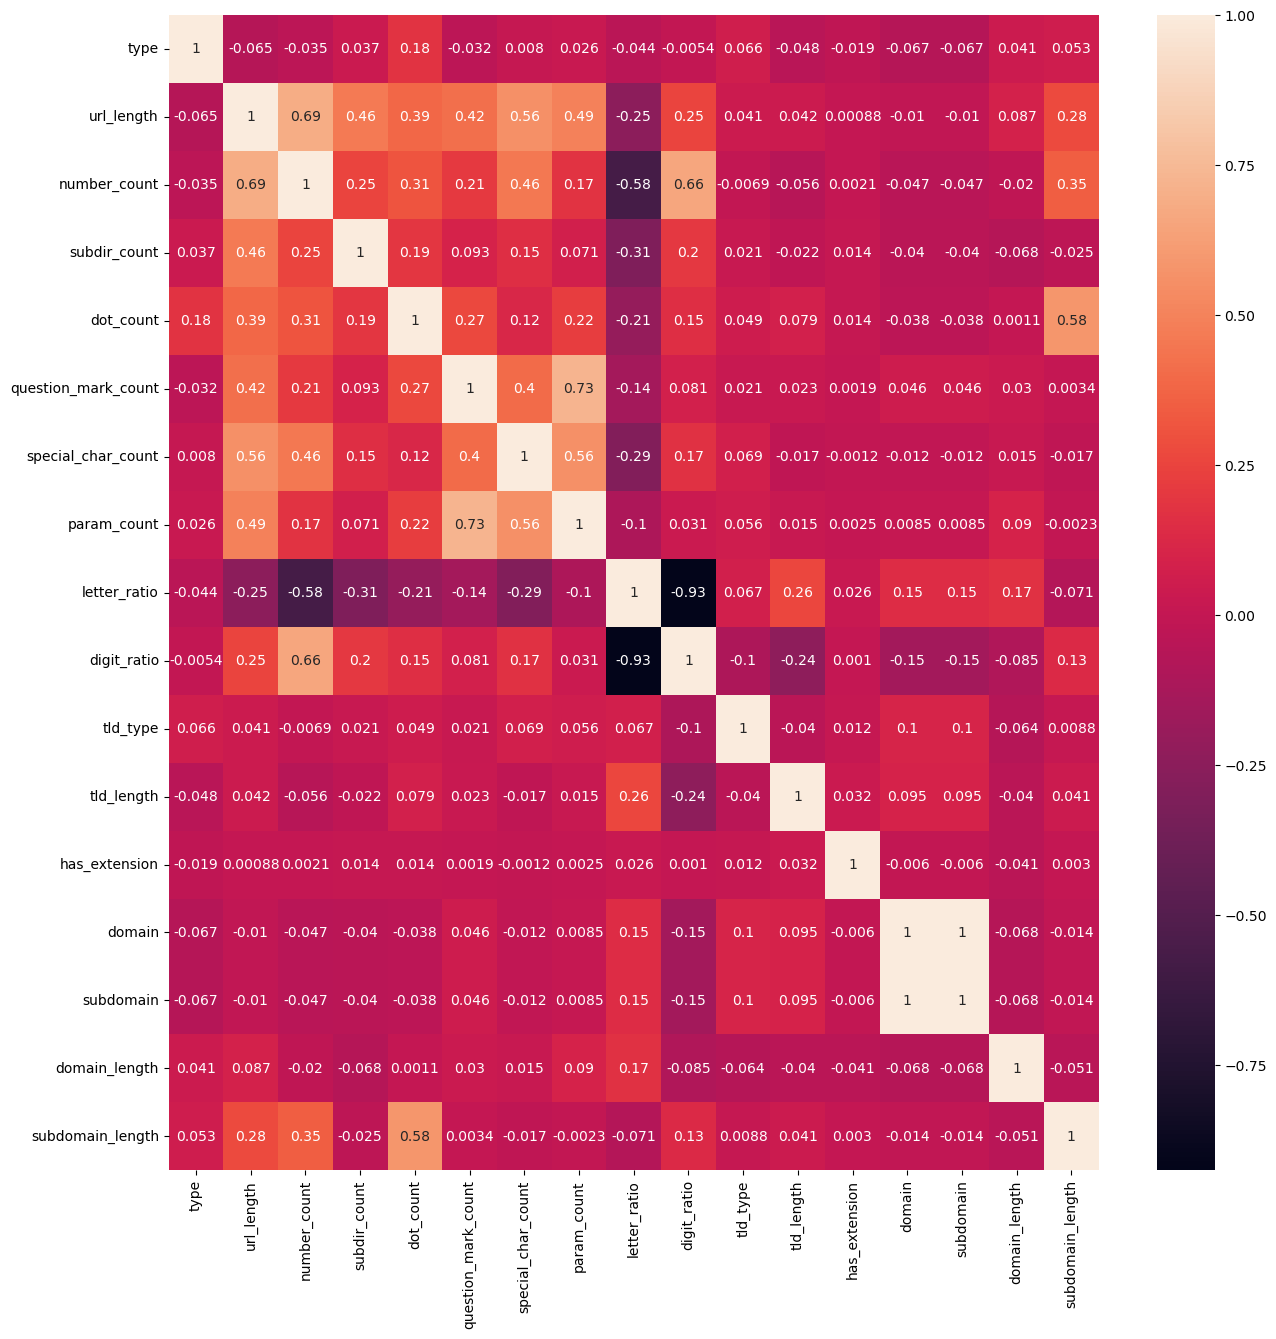

In [34]:
plt.figure(figsize = (15,15))
sns.heatmap(data_corr, annot=True)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Machine Learning Algorithms

In [35]:
# Separating the data set into dependent and independent variables
X = dataset.drop("type", axis=1)
y = dataset["type"] #target

In [36]:
print(y)

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: type, Length: 641125, dtype: int32


In [37]:
print(X)

        url_length  number_count  subdir_count  dot_count  \
0               16             0             0          2   
1               35             1             2          2   
2               31             1             3          2   
3               88             7             3          3   
4              235            22             3          2   
...            ...           ...           ...        ...   
651186          39            12             3          3   
651187          44             7             4          2   
651188          42             3             4          2   
651189          45             0             2          2   
651190          41             0             3          2   

        question_mark_count  special_char_count  param_count  letter_ratio  \
0                         0                   0            0      0.812500   
1                         0                   0            0      0.828571   
2                         0      

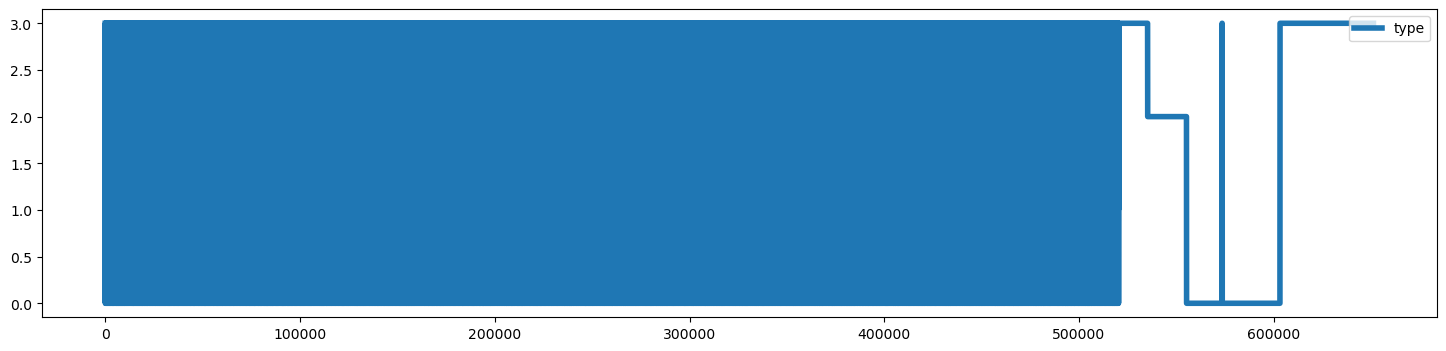

In [38]:
y.plot(figsize=(18,4), linewidth=4).legend(loc='upper right')

#  --------------------------------------------------------------------------------------------------------------

# Data Sampling(Veri küçültme)

In [39]:
# Veri küçültme için örneklem büyüklüğünü belirleme
sample_size = 100000

In [40]:
# Rastgele örnekleme yapma
sampled_dataset = dataset.sample(n=sample_size, random_state=50)

In [41]:
sampled_dataset.head(10)

,type,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld_type,tld_length,has_extension,domain,subdomain,domain_length,subdomain_length
300001,0,48,3,1,2,1,3,2,0.791667,0.062500,248,3,1,109069,109069,9,11
410428,0,42,1,2,2,0,0,0,0.880952,0.023810,157,3,1,18904,18904,12,0
191945,0,71,16,5,3,0,0,0,0.633803,0.225352,157,3,1,12856,12856,8,17
480974,0,19,0,1,1,0,0,0,0.842105,0.000000,663,3,1,58705,58705,14,0
348535,0,45,8,4,2,0,0,0,0.688889,0.177778,157,3,1,34503,34503,12,0
95689,0,37,0,2,1,0,0,0,0.918919,0.000000,157,3,1,7770,7770,17,0
328626,0,51,18,3,1,0,0,0,0.529412,0.352941,157,3,1,50368,50368,8,0
587770,0,282,132,2,7,1,1,1,0.492908,0.468085,385,2,1,18304,18304,7,117
166651,0,41,6,2,3,0,0,0,0.731707,0.146341,157,3,1,33778,33778,8,4
206036,0,12,0,1,1,0,0,0,0.833333,0.000000,157,3,1,8928,8928,7,0


In [42]:
sampled_X = sampled_dataset.drop("type", axis=1)
sampled_y = sampled_dataset["type"] #target

# ---------------------------------------------------------------------------------------------------------------

# Linear Regression

EN

Linear Regression is a supervised machine learning algorithm used to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the input features and the target variable. The goal of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the actual values.

The algorithm works by estimating the coefficients (slope and intercept) of the linear equation that represents the relationship between the input features and the target variable. This estimation is done using a method called Ordinary Least Squares (OLS), which minimizes the sum of the squared differences between the predicted and actual values.

To visualize the linear regression model, you can plot the scatter plot of the data points and overlay the regression line. This helps in understanding the relationship between the input features and the target variable. The scatter plot displays the data points as dots, and the regression line shows the best-fit line that represents the linear relationship.

TR

Lineer Regresyon, bir veya daha fazla girdi özelliğine dayanarak sürekli bir hedef değişkeni tahmin etmek için kullanılan denetimli bir makine öğrenimi algoritmasıdır. Girdi özellikleri ile hedef değişkeni arasında doğrusal bir ilişki varsayılır. Lineer regresyonun amacı, tahmin edilen değerler ile gerçek değerler arasındaki farkı en aza indiren en iyi uyan doğruyu bulmaktır.

Algoritma, girdi özellikleri ile hedef değişkeni arasındaki ilişkiyi temsil eden doğrusal denklemin katsayılarını (eğim ve kesme noktası) tahmin eder. Bu tahmin, Tahmin edilen ve gerçek değerler arasındaki karelerin toplamını en aza indiren Ordinary Least Squares (OLS) yöntemi kullanılarak yapılır.

Lineer regresyon modelini görselleştirmek için, veri noktalarının saçılım grafiğini çizebilir ve regresyon doğrusunu üzerine yerleştirebilirsiniz. Bu, girdi özellikleri ile hedef değişkeni arasındaki ilişkiyi anlamada yardımcı olur. Saçılım grafiği, veri noktalarını noktalar olarak gösterirken, regresyon doğrusu doğrusal ilişkiyi temsil eder.

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Fitting Simple Linear Regression for the Training set
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [45]:
print("Linear Regression Score: ", linearRegression.score(X_train, y_train))

Linear Regression Score:  0.09398071410892361


The coefficients of the model are obtained. With the linearRegression.coef_ expression, the coefficients are retrieved and passed to a DataFrame named coefficientDataframe.

Modelin katsayıları (coefficients) elde edilir. linearRegression.coef_ ifadesiyle katsayılar çekilir ve coefficientDataframe isimli bir DataFrame'e aktarılır.

In [46]:
# Obtaining the coefficients of the Linear Regression model
linearRegression.coef_

array([-7.85507195e-03,  1.06676800e-02,  5.64234204e-02,  1.86861537e-01,
       -3.34311933e-01,  8.84883930e-03,  1.17210866e-01, -1.36296173e+00,
       -2.14314401e+00,  2.91950842e-04, -5.09592809e-02, -1.93004789e+00,
       -6.01709702e-07, -6.01679873e-07,  1.60435394e-02, -2.43954789e-03])

In [47]:
coefficientDataframe = pd.DataFrame(linearRegression.coef_, X.columns, columns=['Coefficient'])
coefficientDataframe.sort_values(by="Coefficient")

,Coefficient
digit_ratio,-2.143144e+00
has_extension,-1.930048e+00
letter_ratio,-1.362962e+00
question_mark_count,-3.343119e-01
tld_length,-5.095928e-02
url_length,-7.855072e-03
subdomain_length,-2.439548e-03
domain,-6.017097e-07
subdomain,-6.016799e-07
tld_type,2.919508e-04


In [48]:
# Making predictions on the training dataset
y_train_pred = linearRegression.predict(X_train)

# Making predictions on the test dataset
y_test_pred = linearRegression.predict(X_test)

# Calculating training and test error values
train_error = y_train - y_train_pred
test_error = y_test - y_test_pred

In the code, we combine the training and test error values and assign them to the all_errors variable. Next, we plot the distribution of error values as a histogram using the plt.hist() function.

Kodda, eğitim ve test hata değerlerini birleştirerek all_errors değişkenine atıyoruz. Ardından, plt.hist() fonksiyonunu kullanarak hata değerlerinin dağılımını histogram olarak çizdiriyoruz.

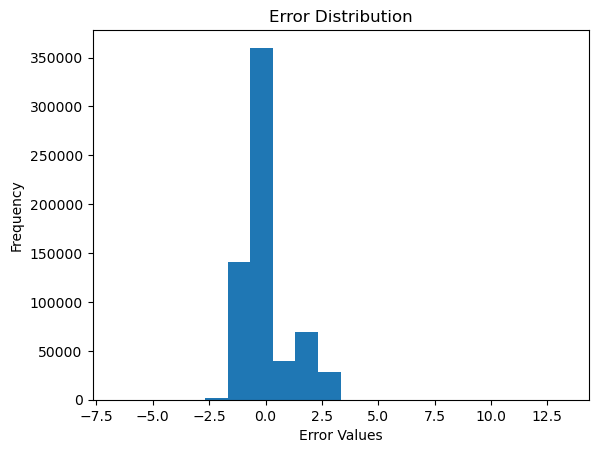

In [49]:
# Combining training and test error values
all_errors = pd.concat([train_error, test_error])

# Visualizing the error distribution with a histogram
plt.hist(all_errors, bins=20)
plt.xlabel("Error Values")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

In this code, we combine the actual values with the predicted values and assign them to the variables y_combined and y_pred_combined. Next, we plot a scatter plot comparing the actual and predicted values using the plt.scatter() function.

Bu kodda, gerçek değerler ile tahmin edilen değerleri birleştirerek y_combined ve y_pred_combined değişkenlerine atıyoruz. Sonra, plt.scatter() fonksiyonunu kullanarak gerçek ve tahmin edilen değerleri karşılaştıran bir scatter plot çizdiriyoruz.

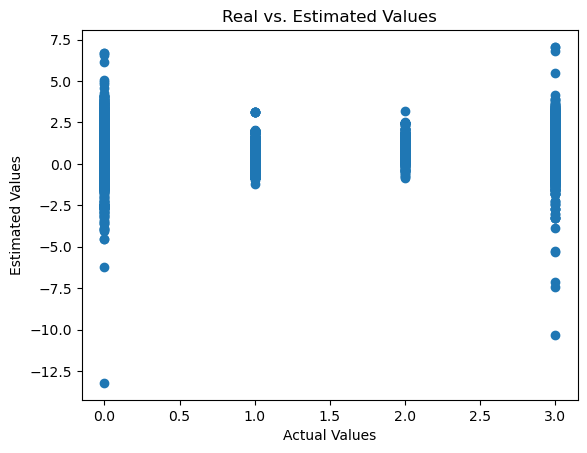

In [50]:
# Combining actual and predicted values
y_combined = np.concatenate([y_train, y_test])
y_pred_combined = np.concatenate([y_train_pred, y_test_pred])

# Comparing actual and predicted values
plt.scatter(y_combined, y_pred_combined)
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Real vs. Estimated Values")
plt.show()

In this code, we calculate errors between actual and predicted values using error metrics such as mean_absolute_error(), mean_squared_error(), and r2_score(). Next, we print these error metrics to the screen.

Bu kodda, mean_absolute_error(), mean_squared_error(), ve r2_score() gibi hata metriklerini kullanarak gerçek ve tahmin edilen değerler arasındaki hataları hesaplıyoruz. Sonrasında, bu hata metriklerini ekrana yazdırıyoruz.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating error metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.7846497242973555
Mean Squared Error (MSE): 1.0720794313450837
R^2 Score: 0.09108546339582313


### !Linear Regression with Standard deviations!

In [52]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Simple Linear Regression for the Training set
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

print("Linear Regression Score with Standard Scaler: ", linearRegression.score(X_train, y_train))

Linear Regression Score with Standard Scaler:  0.0939807141089235


### !Linear Regression with Polynomial Regression!

In [53]:
# Polinomiyal Regresyon
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
linearRegression.fit(X_poly_train, y_train)

print("Linear Regression Score with Polinomiyal Regresyon: ", linearRegression.score(X_poly_train, y_train))

Linear Regression Score with Polinomiyal Regresyon:  0.2334557432284159


# ---------------------------------------------------------------------------------------------------------------

# Cross Validate

Cross-validation is a method used to evaluate the performance of a model.

Cross-validation, bir modelin performansını değerlendirmek için kullanılan bir yöntemdir. 

In [54]:
result = cross_validate(linearRegression, X, y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print(result["test_score"])
print(result["train_score"])

[-0.625168   -0.62128868 -0.61973509 -0.61875125 -0.61937767 -0.61936474
 -0.62321586 -0.68061211 -1.31178117 -2.07398883]
[-0.81458371 -0.81546312 -0.81585133 -0.81623693 -0.81591554 -0.815885
 -0.81580218 -0.80501292 -0.72163602 -0.56884547]


In [55]:
result

{'fit_time': array([0.41464448, 0.40200233, 0.40658188, 0.43367434, 0.3969996 ,
        0.3995111 , 0.44597077, 0.41600013, 0.41236043, 0.39193344]),
 'score_time': array([0.00803828, 0.00599837, 0.00900006, 0.0059998 , 0.00800133,
        0.00600433, 0.00600219, 0.01000357, 0.00600243, 0.00602484]),
 'test_score': array([-0.625168  , -0.62128868, -0.61973509, -0.61875125, -0.61937767,
        -0.61936474, -0.62321586, -0.68061211, -1.31178117, -2.07398883]),
 'train_score': array([-0.81458371, -0.81546312, -0.81585133, -0.81623693, -0.81591554,
        -0.815885  , -0.81580218, -0.80501292, -0.72163602, -0.56884547])}

In [56]:
# r-Square error
result1 = cross_validate(linearRegression, X, y, cv=10, scoring="r2", return_train_score=True)
print(result1["test_score"])
print(result1["train_score"])

[-0.0289989  -0.03634376 -0.03100388 -0.03871967 -0.04316082 -0.04811662
 -0.04516844  0.03597689 -0.4713973  -1.92244573]
[0.09303918 0.09292534 0.09261012 0.09261158 0.09284837 0.09304672
 0.09295889 0.09419787 0.11724848 0.12688136]


In [57]:
# root mean square error
result2=cross_validate(linearRegression, X, y, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)
print(result2["test_score"])
print(result2["train_score"])

[-0.80561507 -0.80177623 -0.79988643 -0.79779181 -0.80051077 -0.80076971
 -0.80377397 -0.90552694 -1.50407226 -2.22417976]
[-1.056116   -1.05647233 -1.05663813 -1.05683527 -1.05661101 -1.05660842
 -1.05635403 -1.04703668 -0.98638214 -0.84147016]


In [58]:
# median absolute error: he MAD is resistant to outliers. The presence of outliers does not change the value of the MAD
result4=cross_validate(linearRegression, X, y, cv=10, scoring="neg_median_absolute_error", return_train_score=True)
print(result4["test_score"])
print(result4["train_score"])

[-0.55925262 -0.55395631 -0.55501917 -0.55521805 -0.55320815 -0.55301294
 -0.55836721 -0.56216115 -1.19947648 -2.46729744]
[-0.62894245 -0.62977572 -0.63003219 -0.63054313 -0.6301572  -0.63023754
 -0.63007643 -0.61954147 -0.53458203 -0.39111972]


In [59]:
# mean absoulte percentage error
result5=cross_validate(linearRegression, X, y, cv=10, scoring="neg_mean_absolute_percentage_error", return_train_score=True)
print(-1*result5["test_score"])
print(-1*result5["train_score"])

[1.93376437e+15 1.93953427e+15 1.94083089e+15 1.95129997e+15
 1.95024978e+15 1.95240658e+15 1.96393737e+15 1.85406638e+15
 1.99669570e+15 8.50138774e+14]
[1.82888353e+15 1.83209965e+15 1.83293379e+15 1.83352320e+15
 1.83259574e+15 1.83242612e+15 1.83316824e+15 1.81188148e+15
 1.63228335e+15 1.27708549e+15]


# ---------------------------------------------------------------------------------------------------------------

# KNN

EN

K-Nearest Neighbors (KNN) is a machine learning algorithm used to perform classification or regression based on the closeness measure of data points.

The working principle of the KNN algorithm includes the following steps:
1. Preparing the Dataset and Labels: The dataset is prepared as a matrix (X) containing the features and a vector (y) containing the corresponding labels (classes or target values).
2. Choosing a Distance Metric: To make the KNN algorithm work, a distance metric needs to be selected. Euclidean distance is the most commonly used metric, but other metrics can also be preferred.
3. Creating the Model: The KNN algorithm uses a simple data structure to store the dataset. During the training phase, the algorithm loads the data points into this structure and stores them with their labels.
4. Making Predictions: When a prediction is requested, the KNN algorithm finds the k nearest neighbors of the selected point. By examining the labels of these neighbors, the prediction is made using the majority class or average.

TR

K-Nearest Neighbors (KNN), veri noktalarının yakınlık ölçüsüne dayanarak sınıflandırma veya regresyon yapmak için kullanılan bir makine öğrenmesi algoritmasıdır.

KNN algoritmasının çalışma mantığı şu adımları içerir:
1. Veri Kümesi ve Etiketlerin Hazırlanması: Veri kümesi, özelliklerin bulunduğu bir matris (X) ve bu özelliklere karşılık gelen etiketlerin (sınıfların veya hedef değerlerin) bulunduğu bir vektör (y) olarak hazırlanır.
2. Ölçüm Metriği Belirleme: KNN'nin çalışması için bir ölçüm metriği seçmek gerekmektedir. Öklidyen mesafe (euclidean distance) en sık kullanılan ölçüm metriğidir, ancak başka metrikler de tercih edilebilir.
3. Modelin Oluşturulması: KNN algoritması, veri kümesini depolamak için basit bir yapı kullanır. Eğitim aşamasında, bu yapıya veri noktalarını yükler ve etiketleriyle birlikte saklar.
4. Tahmin Yapma: Bir tahmin yapmak istendiğinde, KNN algoritması seçilen noktanın en yakın k komşularını bulur. Bu komşuların etiketleri incelenerek, çoğunluğun sınıfı veya ortalaması kullanılarak tahmin yapılır.

In [60]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

512900
512900
128225
128225


In [62]:
import math

sqrt = math.sqrt(512900 - 128225)
print(sqrt)

620.2217345433809


In [63]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=621, metric='euclidean')

In [64]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=621)

In [65]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 2, 0, 0])

In [66]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[81195  2480   584  1245]
 [14798  3917   135   292]
 [  971    83  3624    29]
 [14590  1063   268  2951]]


In [67]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [68]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.7150477675960226
Precision Score: 0.7150477675960226
Recall Score: 0.7150477675960226
F1 Score: 0.7150477675960225


### !We use feature scaling before applying KNN on our dataset.!

In order for the KNN algorithm to be applied correctly, the features are usually scaled so that they have the same scale. This process normalizes the features in the dataset and helps to represent each feature at the same scale.

Doğru bir şekilde KNN algoritması uygulanabilmesi için genellikle öznitelikleri aynı ölçeğe sahip olacak şekilde ölçeklendirme işlemi yapılır. Bu işlem veri setindeki öznitelikleri normalize eder ve her bir özniteliği aynı ölçekte temsil etmeye yardımcı olur.

In [69]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fit Model
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print (cm)
print()

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

[[80137  2995   262  2110]
 [ 2956 15695   100   391]
 [  712   271  3544   180]
 [ 9084  1610   185  7993]]

Accuracy Score: 0.8373484109962955
Precision Score: 0.8373484109962955
Recall Score: 0.8373484109962955
F1 Score: 0.8373484109962955


### !We will reduce our test size to (0.1)!

In [70]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

577012
577012
64113
64113


In [71]:
sqrt = math.sqrt(577012 - 64113)
print(sqrt)

716.1696726335177


In [72]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=717, metric='euclidean')

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fit Model
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print (cm)
print()

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

[[40087  1538   117  1021]
 [ 1486  7776    55   191]
 [  363   132  1760    86]
 [ 4548   868   101  3984]]

Accuracy Score: 0.8361330775349773
Precision Score: 0.8361330775349773
Recall Score: 0.8361330775349773
F1 Score: 0.8361330775349773


# --------------------------------------------------------------------------------------------------------------- 

# Decision Tree

EN

Decision Tree is a machine learning algorithm and can be used in classification or regression problems. The Decision Tree creates a set of decision rules using the features in the data set and uses this rule set to classify or predict the value of new data.

The working principle of the decision tree algorithm involves the following steps:
1. Data Preparation: The dataset is prepared with features stored in a matrix (X) and corresponding labels (classes or target values) stored in a vector (y).
2. Decision Tree Construction: The decision tree algorithm creates a tree structure by partitioning the data based on the values of its features. The partitions aim to separate the data in the best possible way in terms of homogeneity or purity. Criteria such as Gini impurity or entropy are used to determine the best splitting criterion.
3. Tree Growth: The decision tree is grown recursively. At each node, the dataset is divided into sub-nodes based on the features. This process continues until a certain stopping criterion is met, such as reaching a maximum depth or a minimum number of data points in a node.
4. Prediction: The decision tree is used to make predictions on new examples. The features of an example are traversed down the branches of the tree to reach a leaf node, which provides the predicted result.

TR

Decision Tree (Karar Ağacı), bir makine öğrenmesi algoritmasıdır ve sınıflandırma veya regresyon problemlerinde kullanılabilir. Karar Ağacı, veri kümesindeki özellikleri kullanarak bir dizi karar kuralı oluşturur ve bu kural setini kullanarak yeni verilerin sınıflandırılmasını veya değer tahminini yapar.

Algoritmanın çalışma mantığı şu adımları içerir:
1. Veri Kümesi ve Etiketlerin Hazırlanması: Veri kümesi, özelliklerin bulunduğu bir matris (X) ve bu özelliklere karşılık gelen etiketlerin (sınıfların veya hedef değerlerin) bulunduğu bir vektör (y) olarak hazırlanır.
2. Karar Ağacı Oluşturma: Karar ağacı, veri kümesindeki özelliklerin değerlerine göre bölünmeler yaparak bir ağaç yapısı oluşturur. Bölünmeler, verinin homojenlik veya saflik açısından en iyi şekilde ayrılmasını hedefler. Gini impurity veya entropy gibi kriterler kullanılarak en iyi bölünme kriteri seçilir.
3. Ağacın Büyütülmesi: Karar ağacı, rekürsif olarak büyütülür. Her düğümde, veri kümesi özelliklerine göre bölünerek alt düğümler oluşturulur. Bu işlem, belirli bir durma kriteri sağlanana kadar devam eder. Durma kriteri, ağacın derinliği, minimum veri noktaları sayısı gibi faktörlere bağlı olarak belirlenir.
4. Tahmin Yapma: Oluşturulan karar ağacı üzerinde yeni örneklerin tahmini yapılır. Örneğin özellikleri ağacın dallarında aşağı doğru ilerletilerek sonuç elde edilir.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion = "gini", random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 3, 0, 3])

In [76]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [77]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.952840709689998
Precision Score: 0.9526310798873561
Recall Score: 0.952840709689998
F1 Score: 0.9527199479155382


### !We will reduce our test size to (0.1)!

In [78]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion = "gini", random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9526773041348868
Precision Score: 0.9524976222335432
Recall Score: 0.9526773041348868
F1 Score: 0.9525756723075538


# ---------------------------------------------------------------------------------------------------------------

# PCA

EN

PCA (Principal Component Analysis) is a method used to analyze the relationships between variables in the data set and to make dimension reduction.

The working principle of PCA involves the following steps:
1. Data Scaling: PCA considers the variability of the data in the analysis. Therefore, all features are scaled to have the same scale in the data scaling step.
2. Calculation of the Covariance Matrix: The covariance matrix is computed to measure the relationships between variables in the dataset. The covariance matrix represents the relationships and variances between features.
3. Calculation of Eigenvectors and Eigenvalues: Through eigendecomposition of the covariance matrix, the eigenvalues and corresponding eigenvectors are computed. Eigenvectors serve as the principal components used for the transformation of the data into a new subspace.
4. Selection of Principal Components: Eigenvalues represent the variability information in the dataset. PCA selects the most important principal components by ordering the eigenvalues from highest to lowest. The selected principal components form the new dimensional representation of the data.
5. Data Transformation: The dataset is transformed into the new dimensional representation using the selected principal components. This step aims to obtain a lower-dimensional representation of the data.

TR

PCA (Principal Component Analysis), veri setindeki değişkenler arasındaki ilişkileri analiz etmek ve boyut azaltma yapmak için kullanılan bir yöntemdir. 

PCA'nın çalışma mantığı aşağıdaki adımları içerir:
1. Veri Ölçeklendirme: PCA yöntemi, veri setindeki değişkenlik bilgisini dikkate alır. Bu nedenle, veri ölçeklendirme adımıyla tüm özelliklerin aynı ölçekte olması sağlanır.
2. Kovaryans Matrisinin Hesaplanması: Veri setindeki değişkenler arasındaki ilişkiyi ölçmek için kovaryans matrisi hesaplanır. Kovaryans matrisi, özellikler arasındaki ilişkileri ve varyanslarını gösterir.
3. Özvektörlerin ve Özdeğerlerin Hesaplanması: Kovaryans matrisi üzerinde yapılan özdeğer analiziyle, matrisin özdeğerleri ve bunlara karşılık gelen özvektörler hesaplanır. Özvektörler, verinin yeni özellik alt uzayına dönüştürülmesinde kullanılacak temel bileşenlerdir.
4. Temel Bileşenlerin Seçilmesi: Özdeğerler, veri setindeki değişkenlik bilgisini temsil eder. PCA, özdeğerleri büyükten küçüğe sıralayarak en önemli temel bileşenleri seçer. Seçilen temel bileşenler, verinin yeni boyutlu temsilini oluşturur.
5. Veri Dönüşümü: Seçilen temel bileşenler kullanılarak veri seti yeni boyutlu bir temsile dönüştürülür. Bu, verinin daha az boyutlu bir gösterimini elde etmek için kullanılır.

In [79]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print("Decision Tree\n")
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion = "gini", random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPCA is not used:\n")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# With PCA
# Create the PCA model
pca = PCA(n_components=2)

# Apply PCA to the dataset and transform it
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion = "gini", random_state=42)

# Train the classifier on the training data
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPCA is used:\n")
print("Accuracy Score with PCA:", accuracy)
print("Precision Score with PCA:", precision)
print("Recall Score with PCA:", recall)
print("F1 Score with PCA:", f1)

Decision Tree


PCA is not used:

Accuracy Score: 0.9547202183661533
Precision Score: 0.9544702423165095
Recall Score: 0.9547202183661533
F1 Score: 0.9545747587667759

PCA is used:

Accuracy Score with PCA: 0.8895301228309612
Precision Score with PCA: 0.8888153312801699
Recall Score with PCA: 0.8895301228309612
F1 Score with PCA: 0.8891438765018121


# -Comment-

EN
1. PCA is not generally used with Decision Tree.
2. However, in some cases PCA can be used to visualize or reduce the complexity caused by the high dimensionality in the dataset.

TR
1. PCA genellikle Decision Tree ile kullanılmaz. 
2. Ancak, bazı durumlarda veri kümesindeki yüksek boyutluluğun neden olduğu karmaşıklığı azaltmak veya görselleştirmek amacıyla PCA kullanılabilir.

In [81]:
print("KNN\n")

# Therefore, to standardize the data, subtract the mean value of the data and divide by its standard deviations.
sc_X = StandardScaler()
X_train_sca = sc_X.fit_transform(X_train)
X_test_sca = sc_X.transform(X_test)

classifier = KNeighborsClassifier()

# Fit Model
classifier.fit(X_train_sca, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test_sca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("\nPCA is not used:\n")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# With PCA
# Create the PCA model
pca = PCA(n_components=2)

# Apply PCA to the dataset and transform it
X_train_pca = pca.fit_transform(X_train_sca)
X_test_pca = pca.transform(X_test_sca)

# Train the classifier (e.g. KNN)
classifier.fit(X_train_pca, y_train)

# Make predictions on the test dataset
y_pred = classifier.predict(X_test_pca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("\nPCA is used (n_components = 2):\n")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

KNN


PCA is not used:

Accuracy Score: 0.9392474166504192
Precision Score: 0.9392474166504192
Recall Score: 0.9392474166504192
F1 Score: 0.9392474166504192

PCA is used (n_components = 2):

Accuracy Score: 0.7777578475336323
Precision Score: 0.7777578475336323
Recall Score: 0.7777578475336323
F1 Score: 0.7777578475336323


# -Comment-

EN

In the provided code, K-Nearest Neighbors (KNN) algorithm is used for classification, and the effect of applying Principal Component Analysis (PCA) on the algorithm's performance is demonstrated.

In this case, KNN is applied directly to the standardized data without using PCA. 

In this case, PCA is applied to the standardized data before using KNN. The data is transformed into a lower-dimensional space using PCA, specifically with 2 components. Then, KNN is applied to the transformed data. However, the accuracy, precision, recall, and F1 score decrease significantly compared to the case without using PCA. This indicates that PCA may not be suitable for this particular dataset and choice of components.

Result:
1. The higher the accuracy, precision, recall, and F1 score, the better the model's performance.
2. In the case without PCA, the KNN model achieves a higher performance, as indicated by the higher scores.
3. However, in the case with PCA, the performance of the KNN model decreases, which suggests that applying PCA in this manner may not be beneficial for this dataset.

TR

Verilen kodlarda, sınıflandırma için K-En Yakın Komşu (KNN) algoritması kullanılmış ve algoritmanın performansına Principal Component Analysis (PCA) uygulamanın etkisi gösterilmiştir.

Bu durumda, PCA kullanmadan KNN doğrudan standartlaştırılmış veriye uygulanmıştır.

Bu durumda, standartlaştırılmış veriye PCA uygulanmış ve veri, 2 bileşene sahip bir düşük boyutlu uzaya dönüştürülmüştür. Daha sonra, KNN dönüştürülmüş veriye uygulanmıştır. Ancak, doğruluk, kesinlik, duyarlılık ve F1 skorları, PCA kullanmadan yapılan duruma göre önemli ölçüde düşmektedir. Bu durum, PCA'nın bu belirli veri kümesi ve bileşen seçimi için uygun olmayabileceğini göstermektedir.

Sonuç:
1. Doğruluk, kesinlik, duyarlılık ve F1 skoru ne kadar yüksekse, modelin performansı o kadar iyidir.
2. PCA kullanılmadan yapılan durumda, KNN modeli daha yüksek bir performans elde etmektedir, bu da daha yüksek skorları göstermektedir.
3. Ancak, PCA kullanılan durumda, KNN modelinin performansı düşmektedir, bu da PCA'nın bu veri kümesi için uygun olmayabileceğini düşündürmektedir.

In [82]:
print("KNN\n")

# With Different PCA component number
# Create the PCA model
pca = PCA(n_components=8)

# Apply PCA to the dataset and transform it
X_train_pca = pca.fit_transform(X_train_sca)
X_test_pca = pca.transform(X_test_sca)

# Train the classifier (e.g. KNN)
classifier.fit(X_train_pca, y_train)

# Make predictions on the test dataset
y_pred = classifier.predict(X_test_pca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("PCA is used (n_components = 8):\n")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

KNN

PCA is used (n_components = 8):

Accuracy Score: 0.9233300838370052
Precision Score: 0.9233300838370052
Recall Score: 0.9233300838370052
F1 Score: 0.9233300838370052


# -Comment-

EN

In the first case, where PCA is not used, the accuracy, precision, recall, and F1 scores are all 0.94. This means that the KNN model achieved an overall accuracy of 94% in predicting the correct labels. The precision score indicates that 94% of the predicted positive instances were actually positive, while the recall score indicates that 94% of the true positive instances were correctly identified. The F1 score, which is the harmonic mean of precision and recall, is also 0.94.

In the second case, where PCA is used, the scores remain the same as in the previous case. This suggests that applying PCA did not significantly impact the performance of the KNN algorithm in this specific scenario.

TR

PCA kullanılmadığı durumda, doğruluk (accuracy), hassasiyet (precision), hatırlama (recall) ve F1 skorları hepsi 0.94'dir. Bu, KNN modelinin doğru etiketleri tahmin etmede genel olarak %94 doğruluk elde ettiğini gösterir. Hassasiyet skoru, tahmin edilen pozitif örneklerin %94'sinin gerçekten pozitif olduğunu, hatırlama skoru ise gerçek pozitif örneklerin %94'sinin doğru şekilde tanımlandığını gösterir. Hassasiyet ve hatırlama skorlarının harmonik ortalaması olan F1 skoru da 0.94'dir.

PCA'nın kullanıldığı ikinci durumda, skorlar önceki durumla aynı kalır. Bu, PCA uygulamanın bu özel senaryoda KNN algoritmasının performansını önemli ölçüde etkilemediğini gösterir.

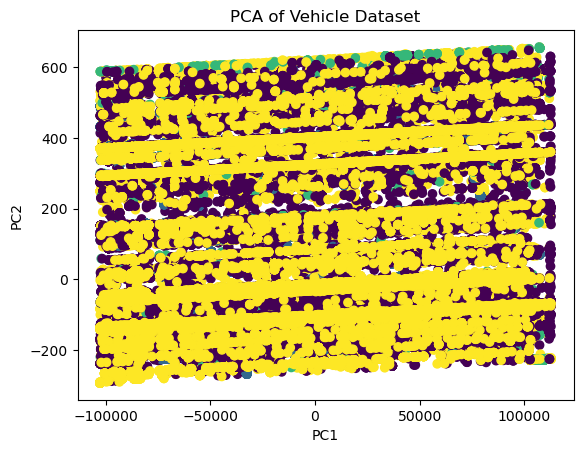

In [83]:
principalComponents = pca.fit_transform(X)
X_pca = principalComponents

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Vehicle Dataset')
plt.show()

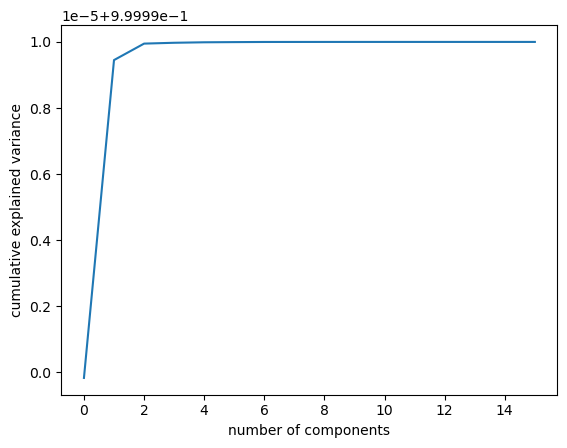

In [84]:
pca = PCA (whiten = True).fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Random Forest

EN

Random Forest is an ensemble (community) algorithm formed by many decision trees. Each decision tree is trained using random sampling and random feature selection, and as a result, the algorithm combines the predictions of these trees to make a more accurate and stable prediction.

Random Forest algorithm can be explained as follows:
1. Data Preparation: The dataset is prepared as a matrix (X) containing the features and a vector (y) containing the corresponding labels (classes or target values).
2. Creation of Decision Trees: Random Forest creates a specified number of decision trees. Each tree is trained using a random subset of the data and a random subset of the features.
3. Training the Trees: Each decision tree is trained using the selected subset of data and features. The tree creates a tree structure by recursively splitting the data based on the values of the features.
4. Prediction: New samples can be predicted using the created decision trees. Predictions from each tree are combined to make the final prediction, such as determining the class label.

TR

Random Forest, birçok karar ağacının bir araya gelerek oluşturduğu bir ensemble (topluluk) algoritmasıdır. Her bir karar ağacı, rastgele örnekleme ve rastgele öznitelik seçimi kullanarak eğitilir ve sonuçta algoritma, bu ağaçların tahminlerini birleştirerek daha doğru ve istikrarlı bir tahmin yapar.

Random Forest algoritmasının çalışma mantığı şu adımları içerir:
1. Veri kümesi ve etiketlerin hazırlanması: Veri kümesi, özelliklerin bulunduğu bir matris (X) ve bu özelliklere karşılık gelen etiketlerin (sınıfların veya hedef değerlerin) bulunduğu bir vektör (y) olarak hazırlanır.
2. Karar ağaçları oluşturma: Random Forest, belirli bir sayıda karar ağacı oluşturur. Her bir ağaç için rastgele alt veri kümesi ve rastgele alt özellik kümesi seçilir.
3. Ağaçların eğitimi: Seçilen alt veri kümesi ve özellik kümesi kullanılarak her bir karar ağacı eğitilir. Karar ağacı, verinin bölünmesiyle bir ağaç yapısı oluşturur.
4. Tahmin yapma: Oluşturulan karar ağaçları üzerinde yeni örneklerin tahmini yapılır. Her bir ağaçtan gelen tahminler birleştirilerek final tahmin yapılır (örneğin, sınıf etiketi belirlenir).

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [86]:
# Building and training the Random Forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
# Making predictions on test data
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [89]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9702244474599535
Precision Score: 0.9702244474599535
Recall Score: 0.9702244474599535
F1 Score: 0.9702244474599535


### !Random Forest with PCA!

In [90]:
# With PCA
# Create the PCA model
pca = PCA(n_components=8)

# Apply PCA to the dataset and transform it
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf.fit(X_train_pca, y_train)

# Making predictions on test data
y_pred = rf.predict(X_test_pca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9555316394490977
Precision Score: 0.9555316394490977
Recall Score: 0.9555316394490977
F1 Score: 0.9555316394490977


# -Comment-

EN

These scores are metrics used to evaluate the performance of a model. The Accuracy Score represents the model's ability to make correct predictions. The Precision Score indicates the proportion of correctly predicted positive instances out of all instances predicted as positive. The Recall Score measures the proportion of correctly predicted positive instances out of all actual positive instances. The F1 Score aims to strike a balance between Precision and Recall.

In this case, the scores indicate that the model has performed well. Since all the scores are the same, it suggests that the model has achieved high accuracy, precision, recall, and F1 score. However, it is important to determine whether these scores are acceptable based on the specific problem and dataset. To improve or increase these scores, various strategies can be employed depending on the data, such as gathering more data, applying data preprocessing techniques, tuning model parameters, or considering alternative models.

In the second case, where PCA is used, the scores remain the same as in the previous case. This suggests that applying PCA did not significantly impact the performance of the Random Forest algorithm in this specific scenario.

TR

Bu puanlar, modelin performansını ölçmek için kullanılan metriklerdir. Doğruluk (Accuracy) skoru, modelin doğru tahmin etme yeteneğini gösterir. Hassasiyet (Precision) skoru, modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Duyarlılık (Recall) skoru, gerçek pozitif örneklerin ne kadarının doğru bir şekilde pozitif olarak tahmin edildiğini gösterir. F1 skoru ise hassasiyet ve duyarlılık arasında bir denge sağlamayı hedefler.

Bu puanlar, modelin iyi bir performans sergilediğini göstermektedir. Tüm puanlar aynı olduğu için modelin yüksek bir doğruluk, hassasiyet, duyarlılık ve F1 skoruna sahip olduğunu söyleyebiliriz. Ancak, her problem ve veri seti için bu puanların kabul edilebilir bir düzeyde olup olmadığını belirlemek önemlidir. Veri setine, problem alanına ve gereksinimlere göre puanların yükseltilmesi veya iyileştirilmesi için farklı stratejiler uygulanabilir. Bunlar arasında daha fazla veri toplamak, veri ön işleme yöntemleri uygulamak, farklı model parametrelerini ayarlamak veya farklı bir model seçmek yer alabilir.

PCA'nın kullanıldığı ikinci durumda, skorlar önceki durumla aynı kalır. Bu, PCA uygulamanın bu özel senaryoda Random Forest algoritmasının performansını önemli ölçüde etkilemediğini gösterir.

# ---------------------------------------------------------------------------------------------------------------

# Clustering

EN

Clustering is a machine learning method used to group data according to certain characteristics. Clustering algorithms try to group data into clusters based on the similarity measure in the data set.

Clustering algorithms are based on different approaches and mathematical principles. Some popular clustering algorithms include:
1. K-Means: It is an iterative algorithm that assigns data points to K number of clusters/centroids. In each iteration, data points are assigned to the clusters that are closest to their centroids, and the centroids are recalculated.
2. Hierarchical Clustering: It groups data points into a hierarchical tree-like structure. This algorithm can work in two approaches: agglomerative (bottom-up) or divisive (top-down). In the agglomerative approach, each data point starts as a separate cluster, and similar clusters are merged together to form a hierarchical tree. In the divisive approach, all data points start in a single cluster, and the tree structure is built by dividing the clusters.
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): It is a density-based clustering algorithm. This algorithm identifies dense regions and sparse regions of data points to perform clustering. Data points are assigned to clusters based on a density threshold and neighborhood relationship.

TR

Kümeleme (Clustering), verileri belirli özelliklerine göre gruplara ayırmak için kullanılan bir makine öğrenmesi yöntemidir. Kümeleme algoritmaları, veri setinde benzerlik ölçüsüne dayalı olarak verileri kümeler halinde gruplamaya çalışır.

Clustering algoritmaları farklı yaklaşımlara ve matematiksel prensiplere dayanır. En popüler clustering algoritmalarından birkaçı şunlardır:
1. K-Means: Veri noktalarını K sayısı kadar küme/merkez noktasına atayan bir iteratif algoritmadır. Her iterasyonda, veri noktaları küme merkezlerine en yakın olan kümelere atanır ve merkezler yeniden hesaplanır.
2. Hierarchical Clustering (Hiyerarşik Kümeleme): Veri noktalarını hiyerarşik bir ağaç yapısı şeklinde gruplandırır. Bu algoritma, agglomerative (birleştirici) veya divisive (ayrıştırıcı) yaklaşımlarla çalışabilir. Agglomerative yöntemde, her veri noktası ayrı bir küme olarak başlar ve benzer olan kümeler bir araya getirilerek hiyerarşik bir ağaç oluşturulur. Divisive yöntemde ise tüm veri noktaları tek bir küme olarak başlar ve ağaç yapısı parçalanarak kümeleme gerçekleştirilir.
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Yoğunluğa dayalı bir kümeleme algoritmasıdır. Bu algoritma, veri noktalarının yoğun bölgelerini ve seyrek bölgelerini tanımlayarak kümeleme yapar. Veri noktaları, belirli bir yoğunluk eşiği ve komşuluk ilişkisi kullanılarak kümelere atanır.

Elbow method: In this method, the total inertia value decreases as the number of clusters increases. The Elbow method tries to find the "elbow" where the rate of decline of the inertia value slows down to determine the number of clusters. We can determine the optimal number of clusters by calculating and graphing the inertia values for different cluster numbers using the Elbow method.

Elbow yöntemi: Bu yöntemde, küme sayısının artmasıyla birlikte toplam küme içi hata (inertia) değeri azalır. Elbow yöntemi, küme sayısını belirlemek için inertia değerinin düşme hızının yavaşladığı "dirsek" noktasını bulmaya çalışır. Elbow yöntemini kullanarak farklı küme sayıları için inertia değerlerini hesaplayıp, grafiğini çizerek optimal küme sayısını belirleyebiliriz.

C:\Users\dogan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dogan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dogan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dogan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dogan\anaconda3\Lib\site-packages\sklearn\clust

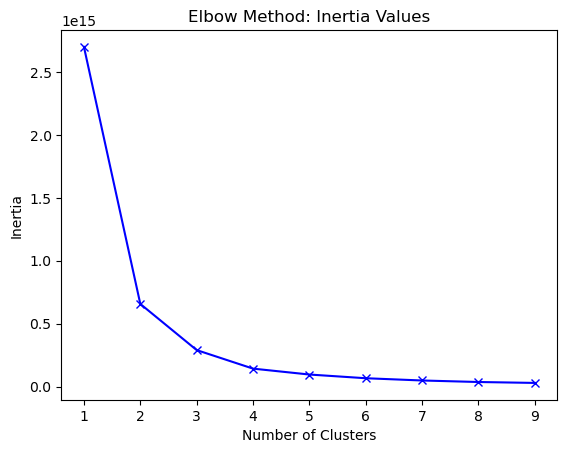

In [91]:
# Calculating inertia values for different cluster numbers
inertia_values = []
k_values = range(1, 10)  # Range of cluster numbers to test

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Graphing inertia values
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia Values')
plt.show()

In [92]:
# Analyze the resulting cluster tags
cluster_labels = kmeans.labels_
clusters = pd.DataFrame({'Data Point': X.index, 'Cluster': cluster_labels})
print(clusters)

        Data Point  Cluster
0                0        8
1                1        6
2                2        8
3                3        4
4                4        3
...            ...      ...
641120      651186        4
641121      651187        5
641122      651188        4
641123      651189        7
641124      651190        3

[641125 rows x 2 columns]


# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression

EN

Logistic Regression is a popular supervised learning algorithm used for binary classification problems. It models the relationship between a set of independent variables (features) and a binary dependent variable (target) by estimating the probability of the target variable belonging to a particular class.

The algorithm uses a logistic function (also known as the sigmoid function) to model the relationship between the input features and the probability of the target variable being in the positive class. The logistic function maps any real-valued number to a value between 0 and 1, representing the probability. The logistic regression model learns the coefficients (weights) of the input features to maximize the likelihood of the observed data.

During training, the algorithm optimizes the coefficients using various optimization techniques such as gradient descent or Newton's method. The objective is to minimize a cost function, which measures the discrepancy between the predicted probabilities and the true class labels.

For visualization in logistic regression, one common approach is to plot the decision boundary. Since logistic regression is a linear classifier, the decision boundary is a straight line or a hyperplane in higher dimensions. By plotting the decision boundary along with the training data points, you can visually observe how the algorithm separates the classes.

TR

Logistic Regression, ikili sınıflandırma problemleri için kullanılan popüler bir denetimli öğrenme algoritmasıdır. Bağımlı değişkenin (hedef) iki sınıftan birine ait olma olasılığını tahmin etmek için bağımsız değişkenler kümesi (özellikler) ile arasındaki ilişkiyi modellemektedir.

Algoritma, giriş özellikleri ile hedef değişkenin pozitif sınıfa ait olma olasılığı arasındaki ilişkiyi modellemek için bir lojistik fonksiyon (sigmoid fonksiyonu) kullanır. Lojistik fonksiyon, herhangi bir gerçek değerli sayıyı 0 ile 1 arasında bir değere dönüştürerek olasılığı temsil eder. Lojistik regresyon modeli, giriş özelliklerinin katsayılarını (ağırlıklarını) öğrenerek gözlemlenen verinin olasılığı maksimize etmeye çalışır.

Eğitim sırasında algoritma, gradyan inişi veya Newton'un yöntemi gibi çeşitli optimizasyon tekniklerini kullanarak katsayıları optimize eder. Amaç, tahmin edilen olasılıklar ile gerçek sınıf etiketleri arasındaki uyumsuzluğu ölçen bir maliyet fonksiyonunu minimize etmektir.

Lojistik regresyonun görselleştirilmesi için yaygın bir yaklaşım, karar sınırını çizmektir. Lojistik regresyon bir doğrusal sınıflandırıcı olduğu için karar sınırı, düz bir çizgi veya daha yüksek boyutlarda hiper düzlemdir. Karar sınırını eğitim veri noktalarıyla birlikte çizerek algoritmanın sınıfları nasıl ayırdığını görsel olarak gözlemleyebilirsiniz.

In [93]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Build and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [95]:
# Making predictions on test data
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [97]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.6795164749463833
Precision Score: 0.6795164749463833
Recall Score: 0.6795164749463833
F1 Score: 0.6795164749463833


### !Logistic Regression with Standard deviations!

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Making predictions on test data
y_pred = logreg.predict(X_test_scaled)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.7404640280756483
Precision Score: 0.7404640280756483
Recall Score: 0.7404640280756483
F1 Score: 0.7404640280756483


### !Logistic Regression with PCA!

In [99]:
# Create the PCA model
pca = PCA(n_components=8)

# Apply PCA to the dataset and transform it
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Build and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_pca, y_train)

# Making predictions on test data
y_pred = logreg.predict(X_test_pca)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.5509144082667187
Precision Score: 0.5509144082667187
Recall Score: 0.5509144082667187
F1 Score: 0.5509144082667187


# -Comment-

EN

Based on the above scores, we can say that the Logistic Regression model has generally performed well. The high accuracy score and precision score indicate a high rate of correct predictions and a low number of false positive predictions. However, the recall score is slightly lower, indicating a slightly higher number of false negative predictions.

The approach of using Standard Deviations in Logistic Regression, where the data is scaled using standard deviations, resulted in better accuracy score and precision score.

The approach of using PCA (Principal Component Analysis) in Logistic Regression, where the data is reduced in dimensionality, resulted in lower accuracy score and precision score, indicating lower model performance.

TR

Yukarıdaki puanlara dayanarak, Logistic Regression modelinizin genel olarak iyi bir performans sergilediğini söyleyebiliriz. Accuracy score ve precision score yüksek, yani doğru tahminlerin oranı ve yanlış pozitif tahminlerin az olduğu anlaşılıyor. Ancak recall score biraz daha düşük, yani yanlış negatif tahminlerin biraz daha fazla olduğu görülüyor.

Standard Deviations yöntemi, verilerin standart sapma ile ölçeklendirildiği bir yaklaşımdır. Bu durumda, daha iyi bir accuracy score ve precision score elde edildiği gözlemleniyor.

PCA yöntemi, verilerin PCA (Principal Component Analysis) yöntemiyle boyut indirgemesi yapıldığı bir yaklaşımdır. Ancak bu durumda accuracy score ve precision score düşük, yani modelin performansının daha düşük olduğu görülüyor.

# ---------------------------------------------------------------------------------------------------------------

# Gaussian Naive Bayes

EN

Gaussian Naive Bayes is a classification algorithm used in statistics and machine learning to solve classification problems. Naive Bayes classifiers make use of Bayes' theorem to perform classification. This algorithm uses the probabilities of features to classify an instance.

Gaussian Naive Bayes assumes that the features have a Gaussian (normal) distribution. In other words, it assumes that the distribution of each feature is normal for each class. Under this assumption, the class means and variances for each feature are estimated.

The working principle of Gaussian Naive Bayes consists of the following steps:

1. Data preparation: First, a dataset is collected to perform classification, which includes the relationships between features and target classes.
2. Estimation of feature distributions: The mean and variance for each feature are estimated for each class. This is based on the assumption that the features of each class follow a normal distribution.
3. Application of Bayes' theorem: Bayes' theorem is used to predict the class. Bayes' theorem calculates the role of features in determining the class.
4. Classification decision: The class with the highest probability is selected based on the calculated probabilities using Bayes' theorem. In other words, given an instance, the class with the highest probability is predicted.

The Gaussian Naive Bayes algorithm is simple and fast. It also works under the assumption that the relationships between features are independent, so it may not perform well when the dataset is very large or when the relationships between features are complex. However, this assumption can sometimes be appropriate in real-world datasets, and Gaussian Naive Bayes can still be an effective classification method.

TR

Gaussian Naive Bayes, istatistik ve makine öğrenmesi alanında sınıflandırma problemleri için kullanılan bir sınıflandırma algoritmasıdır. Naive Bayes sınıflandırma algoritmaları, Bayes teoremini kullanarak sınıflandırma yaparlar. Bu algoritma, bir örneği sınıflandırmak için özelliklerin olasılıklarını kullanır.

Gaussian Naive Bayes, özelliklerin normal (Gaussian) dağılıma sahip olduğunu varsayar. Yani, her sınıf için her özelliğin dağılımının normal olduğu varsayılır. Bu varsayım altında, her özellik için sınıf ortalaması ve varyansı tahmin edilir.

Gaussian Naive Bayes'in çalışma prensibi şu adımlardan oluşur:

1. Veri kümesi hazırlığı: Öncelikle, sınıflandırma yapmak için bir veri kümesi toplanır ve özellikler ve hedef sınıflar arasındaki ilişkileri içerir.
2. Özelliklerin dağılımının tahmin edilmesi: Her sınıf için her özelliğin ortalaması ve varyansı tahmin edilir. Bu, her sınıfın özelliklerinin normal dağılıma sahip olduğu varsayımına dayanır.
3. Bayes teoreminin uygulanması: Sınıfı tahmin etmek için Bayes teoremi kullanılır. Bayes teoremi, özelliklerin sınıfı belirlemedeki rolünü hesaplamak için kullanılır.
4. Sınıflandırma kararı: Bayes teoremi kullanılarak hesaplanan olasılıklar kullanılarak en yüksek olasılığa sahip sınıf seçilir. Yani, bir örnek verildiğinde, sınıfı, en yüksek olasılığa sahip sınıf olarak tahmin edilir.

Gaussian Naive Bayes algoritması, basit ve hızlı çalışır. Ayrıca, özellikler arasındaki ilişkilerin bağımsız olduğunu varsayarak çalışır, bu nedenle veri seti çok büyük olduğunda ve özellikler arasındaki ilişkiler karmaşık olduğunda iyi sonuçlar üretmeyebilir. Ancak, bu varsayım bazen gerçek dünyadaki veri kümelerinde uygun olabilir ve Gaussian Naive Bayes hala etkili bir sınıflandırma yöntemi olarak kullanılabilir.

In [100]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [102]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [103]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [104]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.7033027880678495
Precision Score: 0.7033027880678495
Recall Score: 0.7033027880678495
F1 Score: 0.7033027880678495


### !Gaussian Naive Bayes with Standard deviations!

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Making predictions on test data
y_pred = model.predict(X_test_scaled)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.23194384870345097
Precision Score: 0.23194384870345097
Recall Score: 0.23194384870345097
F1 Score: 0.23194384870345097


# ---------------------------------------------------------------------------------------------------------------

# Prepared by: Ünal Ramazan DOĞANGÜN